In [ ]:
# 사무실 면적이 넓은 구의 버스 정류장/노선 수가 많을 것이다.

In [1]:
import pandas as pd

# 건축물총면적(사무실포함) 데이터 정리

In [2]:
a=pd.read_csv('사무실면적.csv')

In [3]:
a.head()

,자치구별(1),자치구별(2),2020,2020.1,2020.2
0,자치구별(1),자치구별(2),건축물총면적 (㎡),사무실면적 (㎡),사무실면적구성비 (%)
1,서울시,소계,599899329,34800098,5.8
2,서울시,종로구,18342888,2472689,13.5
3,서울시,중구,20641291,3785703,18.3
4,서울시,용산구,17520595,1264089,7.2


In [4]:
a=pd.read_csv('사무실면적.csv',header=1)

In [5]:
a=a.drop(0)

In [6]:
a.head()

,자치구별(1),자치구별(2),건축물총면적 (㎡),사무실면적 (㎡),사무실면적구성비 (%)
1,서울시,종로구,18342888,2472689,13.5
2,서울시,중구,20641291,3785703,18.3
3,서울시,용산구,17520595,1264089,7.2
4,서울시,성동구,21311438,890964,4.2
5,서울시,광진구,16764743,770308,4.6


In [7]:
a=a[['자치구별(2)','건축물총면적 (㎡)','사무실면적 (㎡)']]
a.head()

,자치구별(2),건축물총면적 (㎡),사무실면적 (㎡)
1,종로구,18342888,2472689
2,중구,20641291,3785703
3,용산구,17520595,1264089
4,성동구,21311438,890964
5,광진구,16764743,770308


# 구면적 데이터 정리

In [8]:
b=pd.read_csv('구면적.csv',header=2)

In [9]:
b.head()

,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계.1
0,서울시,소계,605.24,100.00,426,466,12859,96471
1,서울시,종로구,23.91,3.95,17,87,279,1475
2,서울시,중구,9.96,1.65,15,74,253,1580
3,서울시,용산구,21.87,3.61,16,36,356,2597
4,서울시,성동구,16.86,2.79,17,17,471,3645


In [10]:
b=b.drop(0)

In [11]:
b.head()

,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계.1
1,서울시,종로구,23.91,3.95,17,87,279,1475
2,서울시,중구,9.96,1.65,15,74,253,1580
3,서울시,용산구,21.87,3.61,16,36,356,2597
4,서울시,성동구,16.86,2.79,17,17,471,3645
5,서울시,광진구,17.06,2.82,15,7,370,3012


In [16]:
print(stats.pearsonr(b['면적 (km²)'],b['구성비 (%)']))
# P < 0.05로 유의미, 매우 높은 상관관계로 면적 = 구성비로 볼 수 있음.

(0.9999982835828662, 2.378817133809271e-64)


In [17]:
b=b[['자치구별(2)','면적 (km²)']]

In [18]:
b.head()

,자치구별(2),면적 (km²)
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.86
5,광진구,17.06


In [19]:
c=pd.merge(a,b,how='inner')

In [20]:
c.head()

,자치구별(2),건축물총면적 (㎡),사무실면적 (㎡),면적 (km²)
0,종로구,18342888,2472689,23.91
1,중구,20641291,3785703,9.96
2,용산구,17520595,1264089,21.87
3,성동구,21311438,890964,16.86
4,광진구,16764743,770308,17.06


In [21]:
# km²을 ㎡으로 변환
c['면적 (km²)']=c['면적 (km²)']/0.0000010000

In [22]:
c.rename(columns={'면적 (km²)':'면적 (㎡)','자치구별(2)':'자치구'},inplace=True)

In [23]:
c.head()

,자치구,건축물총면적 (㎡),사무실면적 (㎡),면적 (㎡)
0,종로구,18342888,2472689,23910000.0
1,중구,20641291,3785703,9960000.0
2,용산구,17520595,1264089,21870000.0
3,성동구,21311438,890964,16860000.0
4,광진구,16764743,770308,17060000.0


# 정류장,노선 수 데이터 정리

In [24]:
d=pd.read_csv('df_seoul_bus_station.csv')

In [25]:
d.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [26]:
d=d[['자치구','정류장수','노선수']]

In [27]:
e=pd.merge(c,d,how='inner',on='자치구')

In [28]:
e=e.set_index('자치구')
e.head()

,건축물총면적 (㎡),사무실면적 (㎡),면적 (㎡),정류장수,노선수
자치구,,,,,
종로구,18342888,2472689,23910000.0,349,106
중구,20641291,3785703,9960000.0,178,103
용산구,17520595,1264089,21870000.0,323,67
성동구,21311438,890964,16860000.0,435,58
광진구,16764743,770308,17060000.0,269,41


In [29]:
# 구 별 전체 건축물중 사무실이 차지하는 비율
e['사무실면적비율']=e['사무실면적 (㎡)']/e['건축물총면적 (㎡)']
# 구 별 전체 면적 중 건축물이 차지하는 비율
e['면적대비건축물면적비율']=e['건축물총면적 (㎡)']/e['면적 (㎡)']

In [30]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')       

In [31]:
# 1. 사무실면적비율이 높은 구의 정류장,노선 수가 많을 것이다.
print(stats.pearsonr(e['정류장수'],e['사무실면적비율']))
print(stats.pearsonr(e['노선수'],e['사무실면적비율']))
# P > 0.05로 정류장 가설 기각
# O < 0.05로 노선 가설 유의미

(-0.2289298012731899, 0.2710070253954641)
(0.5389607574414681, 0.005437079629456515)


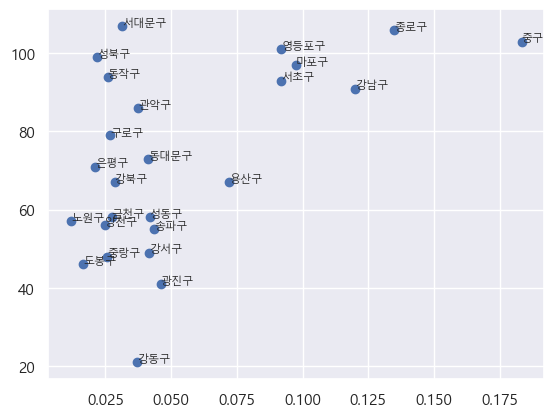

In [32]:
plt.scatter('사무실면적비율','노선수',data=e)
for name,x,y in zip(e.index,e['사무실면적비율'],e['노선수']): 
    plt.text(x, y, name,fontsize=8) 
plt.show()

In [33]:
(e['노선수']/e['사무실면적비율']).sort_values(ascending=True)

자치구
중구       561.600573
강동구      565.409338
강남구      757.792325
종로구      786.328620
광진구      892.311209
용산구      928.637038
마포구      994.689649
서초구     1013.161723
영등포구    1098.554773
강서구     1181.737102
송파구     1260.402092
성동구     1387.332602
동대문구    1773.256039
중랑구     1879.230929
금천구     2123.356178
양천구     2261.259211
관악구     2296.177759
강북구     2355.402799
도봉구     2779.233822
구로구     2960.200725
은평구     3384.938377
서대문구    3424.077127
동작구     3635.749263
성북구     4508.884176
노원구     4819.533208
dtype: float64

In [34]:
# 2. 건축물면적비율이 높은 구의 정류장,노선 수가 많을 것이다.
print(stats.pearsonr(e['정류장수'],e['면적대비건축물면적비율']))
print(stats.pearsonr(e['노선수'],e['면적대비건축물면적비율']))
# P < 0.05로 정류장 가설 유의미
# P > 0.05로 노선 가설 기각

(-0.49253933347891754, 0.012373579719535278)
(0.14261098460736335, 0.4964804377908355)


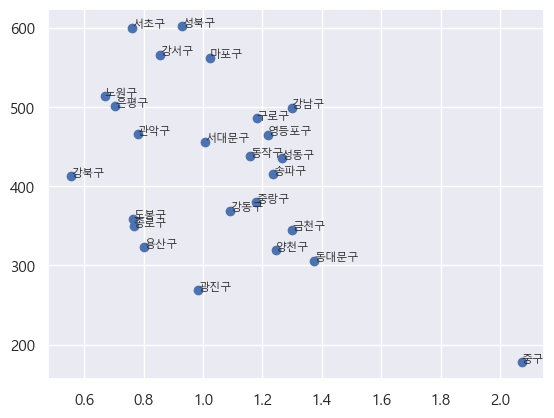

In [35]:
plt.scatter('면적대비건축물면적비율','정류장수',data=e)
for name,x,y in zip(e.index,e['면적대비건축물면적비율'],e['정류장수']): 
    plt.text(x, y, name,fontsize=8) 
plt.show()

In [36]:
(e['정류장수']/e['면적대비건축물면적비율']).sort_values(ascending=True)

자치구
중구       85.889977
동대문구    222.809761
양천구     256.372818
금천구     265.401769
광진구     273.737569
중랑구     322.293889
송파구     335.980886
강동구     338.029967
성동구     344.139143
동작구     377.687706
영등포구    382.011854
강남구     384.393047
용산구     403.183225
구로구     411.737096
서대문구    452.712328
종로구     454.922366
도봉구     469.030635
마포구     549.164787
관악구     597.462915
성북구     647.345216
강서구     662.323355
은평구     710.435501
강북구     743.748421
노원구     768.293251
서초구     788.807971
dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x= e['면적대비건축물면적비율'].values
y= e['정류장수'].values

x = x.reshape(-1,1)
y = y.reshape(-1,1)

lr.fit(x, y)

import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     7.367
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0124
Time:                        21:30:21   Log-Likelihood:                -148.14
No. Observations:                  25   AIC:                             300.3
Df Residuals:                      23   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        597.6482     66.498      8.987      0.000     460.086     735.210
x1          -165.0155     60.797     -2.714      0.012    -290.784     -39.247
==============================================================================
Omnibus:                        2.055   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                1.102
Skew:                          -0.030   Prob(JB):                        0.576
Kurtosis:                       1.973   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""